<p style="padding: 10px;
          color: #7DBCE6;
          text-align: center;
          font-family:Verdana;
          font-size:190%;">
Fuel Consumption EDA & Prediction

</p>
      
<img src="https://media.giphy.com/media/l2R0e9y6A304JkFOg/source.gif"> 


# CONTENTS:
* [1. Importing Libraries](#1)
* [2. Importing Dataset](#2)
    * [2.1 Columns Description](#2.1)
* [3. Exploratory Analysis](#3)
* [4. Missing Values](#4)
* [5. Data Visualization](#5)
* [6. Outlier Detection](#6)
* [7. Feature Engineering](#7)
* [8. Preprocessing](#8)
* [9. Model Building](#9)
* [10. Model Evaluation](#10)
* [11. Model Regulariztaion](#11)
* [12. Model Tuning](#12)
* [13. AVeraging models](#13)
* [14. Visualization the result](#14)

 ### [1. IMPORTING LIBRARIES](#0)<a id="1"></a> <br>
 

In [88]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
from plotly.subplots import make_subplots
from matplotlib import colors
import plotly.graph_objs as go
import plotly.express as px
from scipy import stats
from scipy.stats import norm, skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             mean_absolute_error,
                             mean_squared_log_error)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#for averaging models:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import warnings
warnings.filterwarnings("ignore")

### [2. IMPORTING DATASET](#0)<a id="2"></a> <br>

In [33]:
#reading the dataset

columns=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]          

data=pd.read_csv("auto-mpg.csv",na_values="?")
df=data.copy()
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [34]:
def auto_preprocess(dataframe):
    df = dataframe.copy()
    auto_misspelled = {'chevroelt': 'chevrolet',
                       'chevy': 'chevrolet',
                       'vokswagen': 'volkswagen',
                       'vw': 'volkswagen',
                       'hi': 'harvester',
                       'maxda': 'mazda',
                       'toyouta': 'toyota',
                       'mercedes-benz': 'mercedes'}
    df['name'] = [auto_misspelled[key].title() if key in auto_misspelled else
                   key.title() for key in [i.split()[0] for i in df['car name']]]
    df['model'] = [' '.join(i.split()[1:]).title() for i in df['car name']]
    
    df = df.drop(columns = ['car name'], axis = 1)
    return df


df = auto_preprocess(df)
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,model
393,27.0,4,140.0,86.0,2790,15.6,82,1,Ford,Mustang Gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,Volkswagen,Pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,Dodge,Rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,Ford,Ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,Chevrolet,S-10


### [2.1 Columns Description](#0)<a id="2.1"></a> <br>

In [35]:
# columns description:

# mpg: miles per gallon
# cylinders: number of cylinders
# displacement: engine displacement
# horsepower: engine horsepower
# weight: vehicle weight
# acceleration: acceleration time from 0 to 60 mph, (sec.)
# model year: model year
# origin: origin of car
# car name: car name


### [3. EXPLORATORY ANALYSIS](#0)<a id="3"></a> <br>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   model         398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [37]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                               'Classes': [dataframe[i].nunique() \
                                           for i in dataframe.columns]})

    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,weight,351
1,model,300
2,mpg,129
3,acceleration,95
4,horsepower,93
5,displacement,82
6,name,30
7,model year,13
8,cylinders,5
9,origin,3


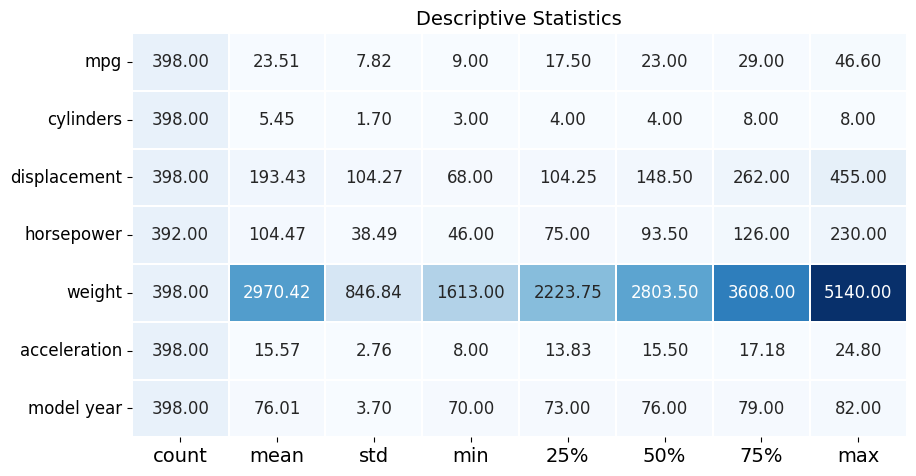

In [38]:
# statistical summary of numerical columns
num_cols =df.drop(["name","model","origin"],axis=1).columns
cmap1 = 'Blues'
plotly_template = 'ggplot2'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df[num_cols])

### [4. MISSING VALUES](#0)<a id="5"></a> <br>

In [39]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
model           0
dtype: int64

In [40]:
#filling missing values with simple imputer

si=SimpleImputer(missing_values=np.nan,strategy="median")
df["horsepower"]=si.fit_transform(df[["horsepower"]])

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
model           0
dtype: int64

### [5. DATA VISUALIZATION](#0)<a id="4"></a> <br>


In [41]:
#correlation matrix
df_corr=df.drop(["name","model"],axis=1).corr()
px.imshow(df_corr,color_continuous_scale=["red","yellow","green"],title="Correlation Matrix",
          template="plotly_dark")

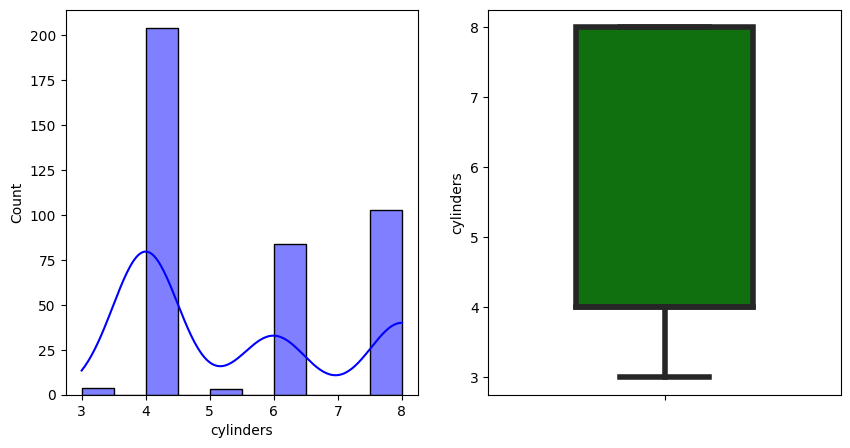

cylinders: 
 4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


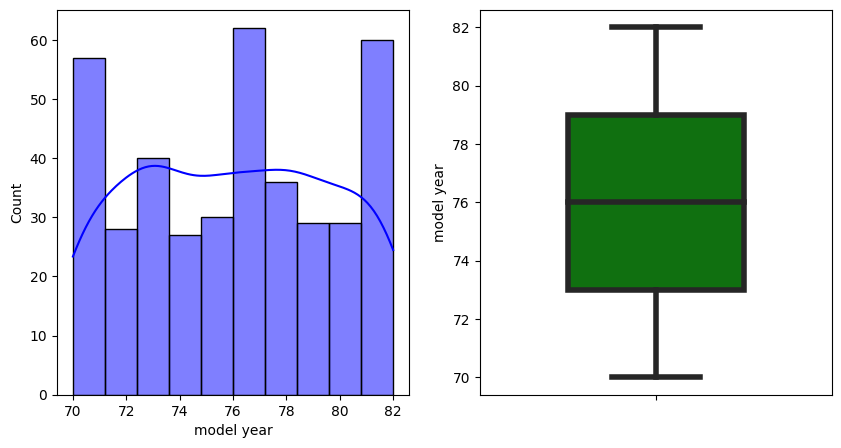

model year: 
 73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model year, dtype: int64


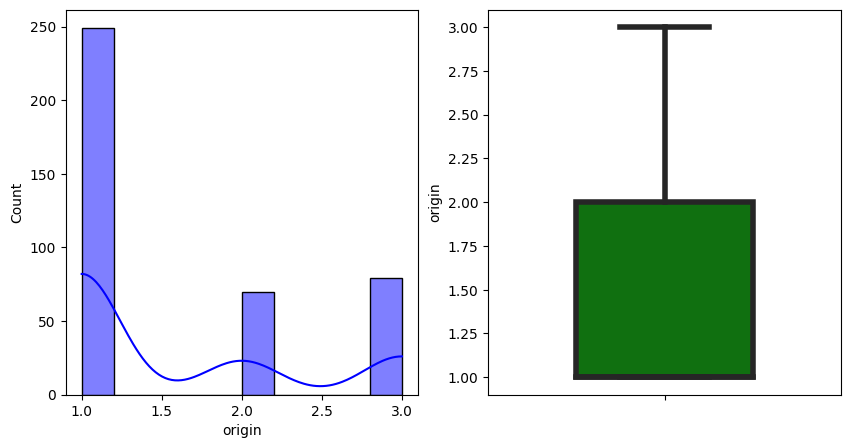

origin: 
 1    249
3     79
2     70
Name: origin, dtype: int64


In [42]:
# plotting categorical variables distribution:
df1=df[["cylinders","model year","origin"]]

def plot_distribution(df1, var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[var],color="blue",kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=df[var],color="green",orient="v",width=0.5,linewidth=4)
    plt.show()
    var=df[var]
    varvalue=var.value_counts()
    
    print("{}: \n {}".format(var.name,varvalue))

features=["cylinders","model year","origin"]
for col in df[features]:
    plot_distribution(df1,col)


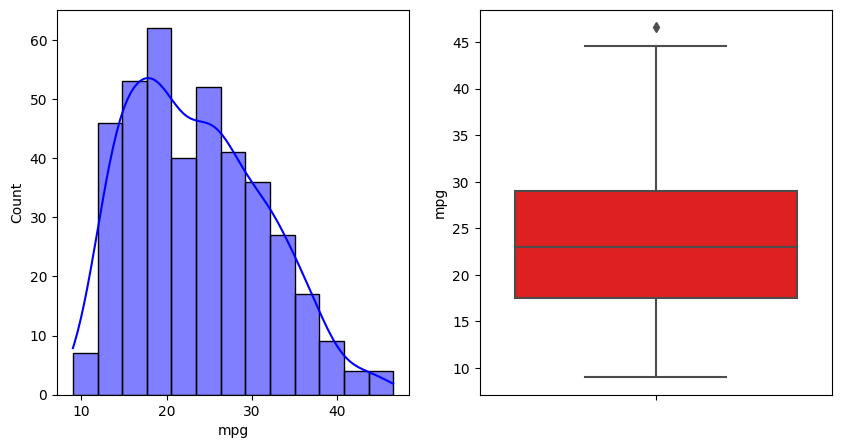

mpg: 
 13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64


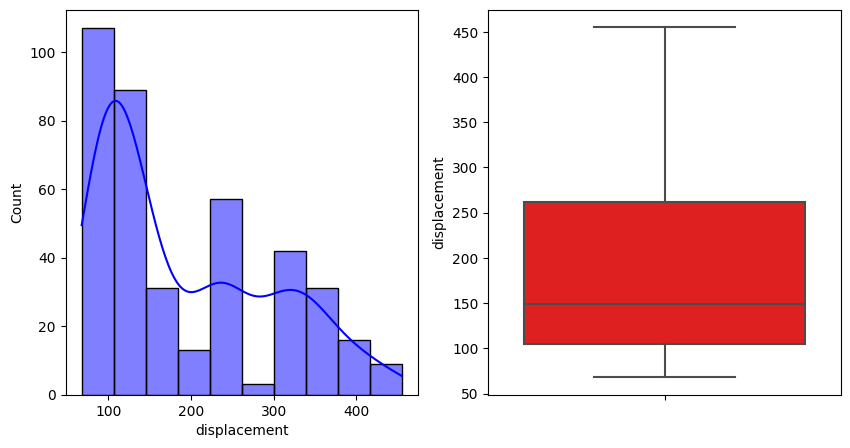

displacement: 
 97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: displacement, Length: 82, dtype: int64


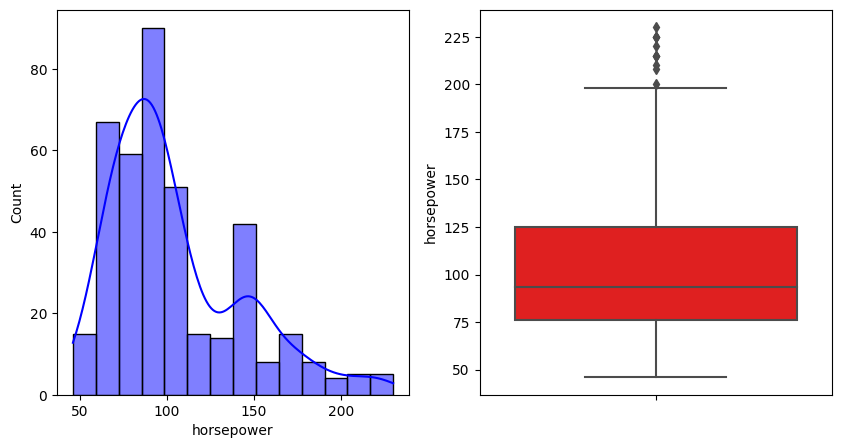

horsepower: 
 150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: horsepower, Length: 94, dtype: int64


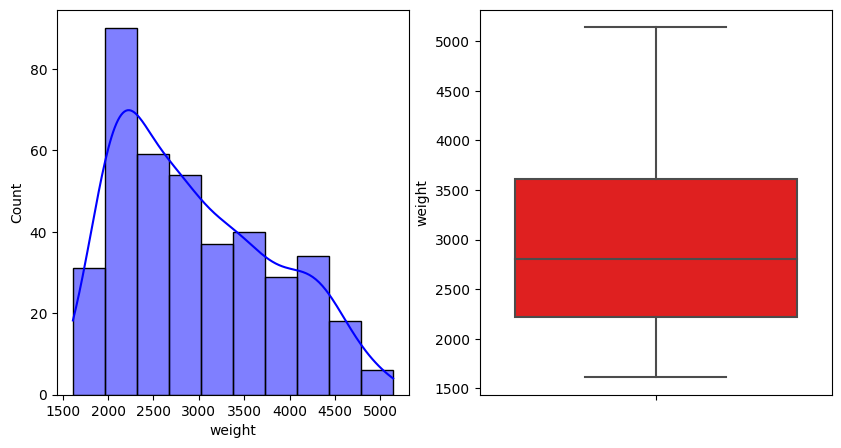

weight: 
 1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: weight, Length: 351, dtype: int64


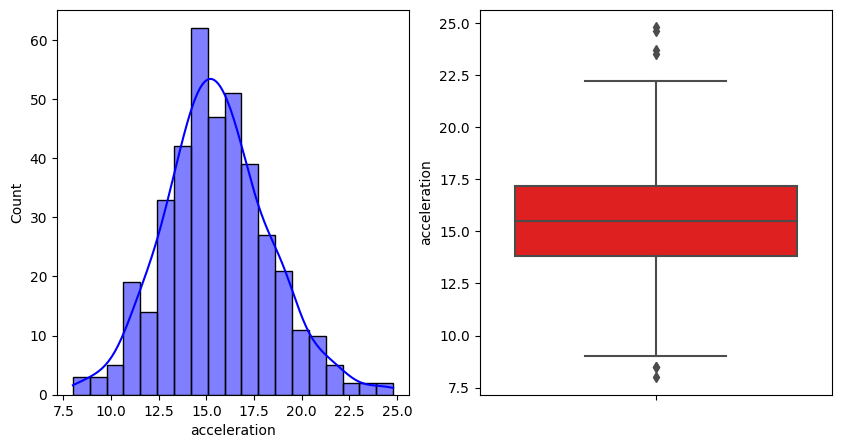

acceleration: 
 14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: acceleration, Length: 95, dtype: int64


In [43]:
# plotting numerical variables distribution:
num_cols =df.drop(["name","model","origin","model year","cylinders"],axis=1).columns

def plot_distribution(num_cols, var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[var],color="blue",kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=df[var],color="red")
    plt.show()
    var=df[var]
    varvalue=var.value_counts()
    
    print("{}: \n {}".format(var.name,varvalue))

features=["Age","Fare","Parch","SibSp"]
for col in num_cols:
    plot_distribution(df,col)

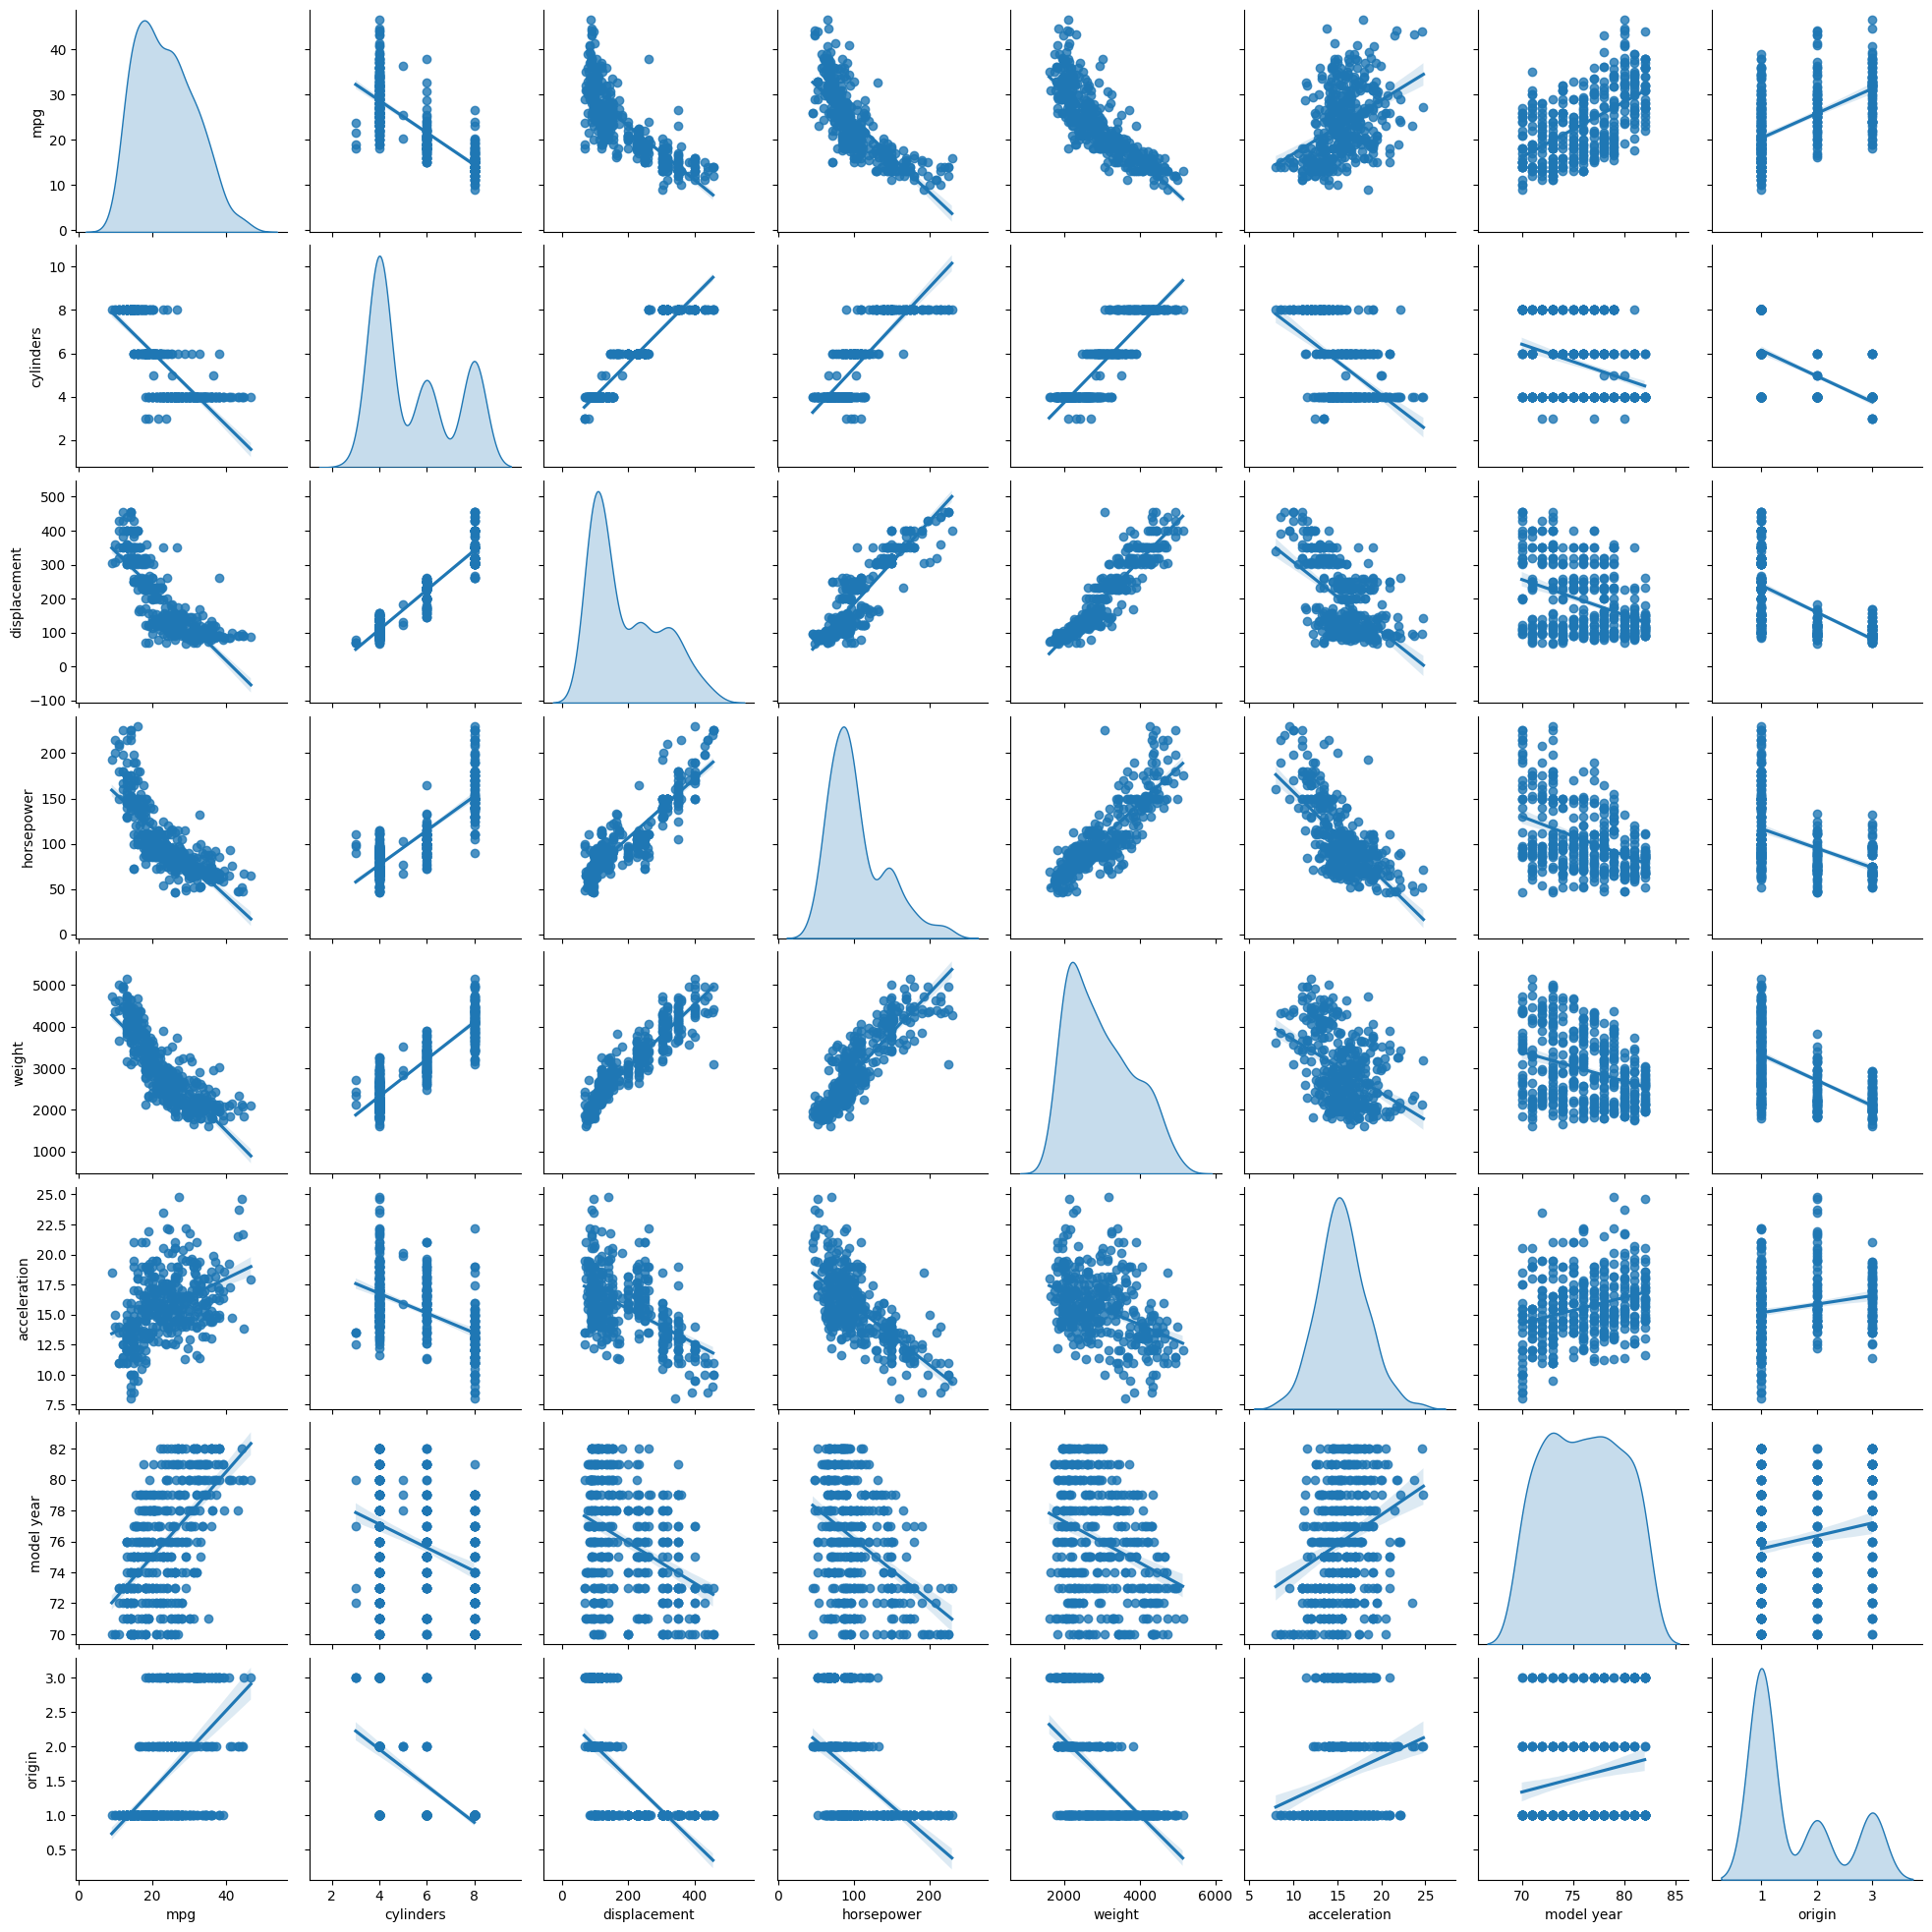

In [44]:
# plotting distribution of all variables:
df1=df.drop(["name","model"],axis=1)
sns.pairplot(df1,diag_kind="kde",kind="reg",palette="Set2")

In [46]:
# correlation between origin,horsepower and mpg:

px.scatter(df,x="horsepower",y="mpg",color="origin",template="plotly_dark",
           title="Correlation between origin,horsepower and mpg",
           labels={"horsepower":"Horsepower","mpg":"Miles per gallon"})

In [47]:
# correlation between weight, mpg and origin:

px.scatter(df,x="weight",y="mpg",color="origin",template="plotly_dark",
              title="Correlation between weight,mpg and origin",labels={"weight":"Weight","mpg":"Miles per gallon"},
              )

In [48]:
#correlation between Horsepower - MPG - Weight
px.scatter(df,y="horsepower",x="mpg",color="weight",template="plotly_dark",
              title="Correlation between weight,mpg and horsepower",labels={"weight":"Weight","mpg":"Miles per gallon"})

In [49]:
#correlation between Horsepower - MPG - Displacement - Weight :

px.scatter_3d(df,x="horsepower",y="mpg",z="weight",color="displacement",template="plotly_dark",
                title="Correlation between weight,mpg and horsepower",labels={"weight":"Weight","mpg":"Miles per gallon"})

In [50]:
# Top 10 cars with highest horsepower:
fig = px.bar(df[['horsepower','model','name']]. \
        sort_values('horsepower', ascending = False)[:10],
             y = 'model',
             x = 'horsepower',
             text = 'horsepower',
             labels={'name':'',
                     'horsepower': 'Horsepower',
                     'name': 'Names'},
             color = 'name')

fig.update_layout(title= dict(text = 'TOP 10 Horsepower',
                              x = 0.5,
                              y = 0.95,
                              xanchor = 'center',
                              yanchor = 'top'),
                  xaxis = dict(title = 'Horsepower'),
                  yaxis = dict(categoryorder='total ascending'),
                  font=dict(family ='Verdana',
                            size = 14),
                  template="plotly_dark")

fig.show()

In [51]:
# Top 10 cars with highest weight:

fig=px.bar(df[['weight','model','name']].sort_values('weight',ascending=False)[:10],
            y="model",x="weight",text="weight",labels={"name":"Names","weight":"Weight"},
            color="name",template="plotly_dark")

fig.update_layout(title= dict(text = 'TOP 10 Weight',
                              x = 0.5,
                              y = 0.95,
                              xanchor = 'center',
                              yanchor = 'top'),
                  xaxis = dict(title = 'Weight'),
                  yaxis = dict(categoryorder='total ascending'),
                  font=dict(family ='Verdana',
                            size = 14),
                  template="plotly_dark")

fig.show()

In [52]:
# Top 10 cars with highest acceleration:
fig = px.bar(df[['acceleration','model','name']]. \
        sort_values('acceleration', ascending = False)[:10],
             y = 'model',
             x = 'acceleration',
             text = 'acceleration',
             labels={'name':'Names',
                     'acceleration': 'acceleration'},
             color = 'name')

fig.update_layout(title= dict(text = 'TOP 10 acceleration',
                              x = 0.5,
                              y = 0.95,
                              xanchor = 'center',
                              yanchor = 'top'),
                  xaxis = dict(title = 'acceleration'),
                  yaxis = dict(categoryorder='total ascending'),
                  font=dict(family ='Verdana',
                            size = 14),
                  template="plotly_dark")

fig.show()

In [53]:
# Top 10 cars with highest displacement:
fig = px.scatter(df[['displacement','model','name']]. \
        sort_values('displacement', ascending = False)[:10],
             y = 'model',
             x = 'displacement',
             labels={'name':'Names',
                     'displacement': 'displacement'},
             color = 'name',size="displacement")

fig.update_layout(title= dict(text = 'TOP 10 displacement',
                              x = 0.5,
                              y = 0.95,
                              xanchor = 'center',
                              yanchor = 'top'),
                  xaxis = dict(title = 'displacement'),
                  yaxis = dict(categoryorder='total ascending'),
                  font=dict(family ='Verdana',
                            size = 14),
                  template="plotly_dark")

fig.show()


In [54]:
data = [go.Scatter(x = df['mpg'],
                   y = df['horsepower'],
                   mode = 'markers',
                   text=df['weight'],
                   marker=dict(size=10,
                               color = df['weight'],
                               showscale=True,
                               colorscale = 'Viridis',
                               colorbar = dict(title='Weight'),
                               opacity=0.8))]

layout = go.Layout(title=dict(text='Horsepower - MPG - Weight',
                              y=0.9,
                              x=0.5,
                              xanchor= 'center',
                              yanchor= 'top'),
                              xaxis = dict(title = 'MPG'),
                              yaxis =dict(title = 'Horsepower'),
                   template=plotly_template)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

### [6. OUTLIER DETECTION](#0)<a id="6"></a> <br>

In [55]:
num_cols=['mpg','displacement','horsepower','weight','acceleration']

for i in df[num_cols]:
    fig=px.box(df,y=i,color="origin",template="plotly_dark",title="Boxplot of "+i)
    fig.update_layout(title= dict(text = 'Boxplot of '+i,
                                x = 0.5,
                                y = 0.95,
                                xanchor = 'center',
                                yanchor = 'top'),
                    xaxis = dict(title = i),
                    yaxis = dict(categoryorder='total ascending'),
                    font=dict(family ='Verdana',
                            size = 14),
                    template="plotly_dark")
    fig.show()

In [56]:
# Q1=df_table.quantile(0.25)
# Q3=df_table.quantile(0.75)
# IQR=Q3-Q1 #interquartile range

# lower_limit=Q1-1.5*IQR
# upper_limit=Q3+1.5*IQR

# ((df_table>upper_limit) | (df_table<lower_limit)).sum() #aykırı değer sayısı

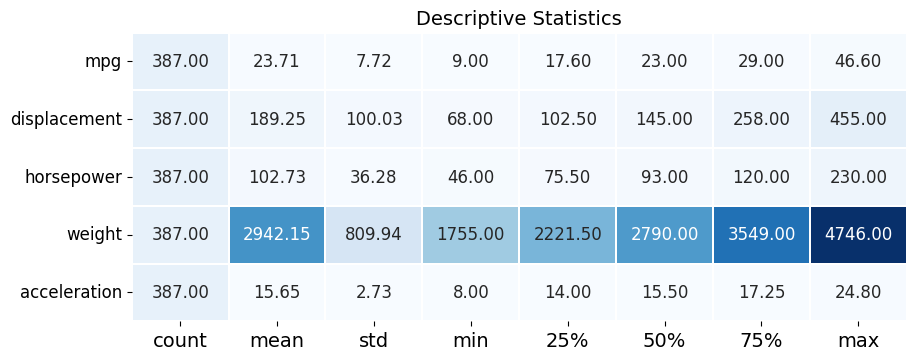

In [57]:
# filling outliers in numerical columns:

from sklearn.neighbors import LocalOutlierFactor

df_table=df[num_cols]

clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1) #n_neighbors: komşu sayısı, contamination: aykırı değer oranı
clf.fit_predict(df_table)
df_scores=clf.negative_outlier_factor_
df_scores[:20] 
np.sort(df_scores)[:20] 
    
threshold=np.sort(df_scores)[10] #2. değer eşik değerdir

outlier_tf=df_scores>threshold
outlier_tf

new_df=df_table[df_scores>threshold] #aykırı değerler silindi



desc_stats(new_df[num_cols])





In [58]:
# combining the new dataframe with categorical columns:
new_df['origin']=df['origin']
new_df['model']=df['model']
new_df['name']=df['name']
new_df['cylinders']=df['cylinders']
new_df['model year']=df['model year']
df=new_df

### [7. Feature Engineering](#0)<a id="7"></a> <br>

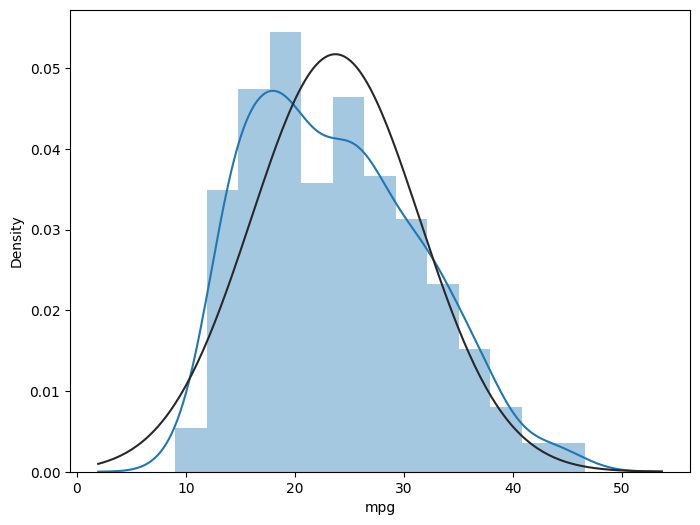

mu: 23.70749354005168 sigma = 7.714419578182979


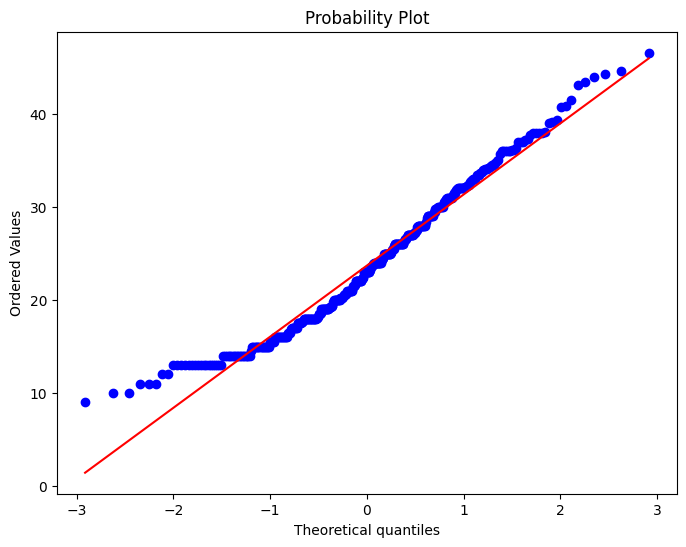

In [59]:
#skewness check:
#if skewness is  greater than 1, the distribution has positive skewness.
#if skewness is  less than -1, the distribution has negative skewness.

# MPG:
plt.figure(figsize = (8, 6))
sns.distplot(df.mpg, fit= norm) #fit=norm: normal distribution
plt.show()

(mu, sigma) = norm.fit(df["mpg"]) #mu: mean, sigma: standard deviation

print("mu: {} sigma = {}".format(mu, sigma))

# QQ plot: to check if the distribution is normal or not:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df.mpg, plot = plt)
plt.show()


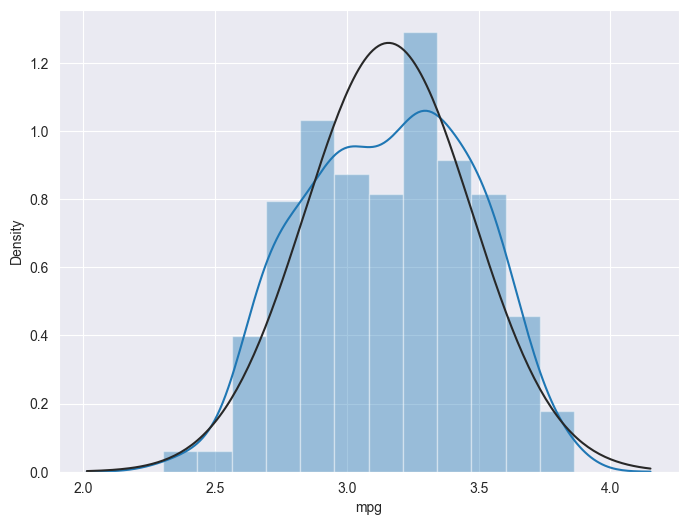

mu: 23.70749354005168 sigma = 7.714419578182979


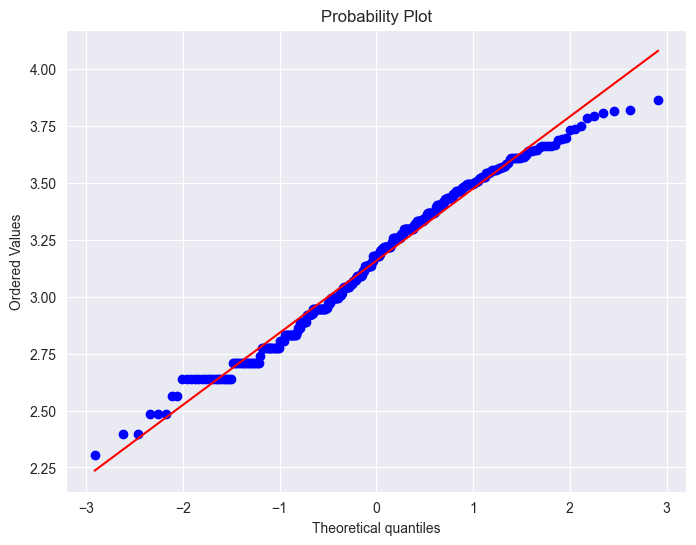

In [60]:
# distribution of mpg is not normal. We will apply log transformation to make it normal:

df['mpg'] = np.log1p(df['mpg'])


sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.distplot(df.mpg, fit= norm) #fit=norm: normal distribution
plt.show()
print("mu: {} sigma = {}".format(mu, sigma))

# QQ plot again:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df.mpg, plot = plt)
plt.show()

In [61]:
# check skewness of independent variables:

skew_features = df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

skewness = pd.DataFrame({'Skew' :skew_features})
skewness



,Skew
horsepower,1.095066
displacement,0.717484
weight,0.483740
acceleration,0.282759
mpg,-0.106241


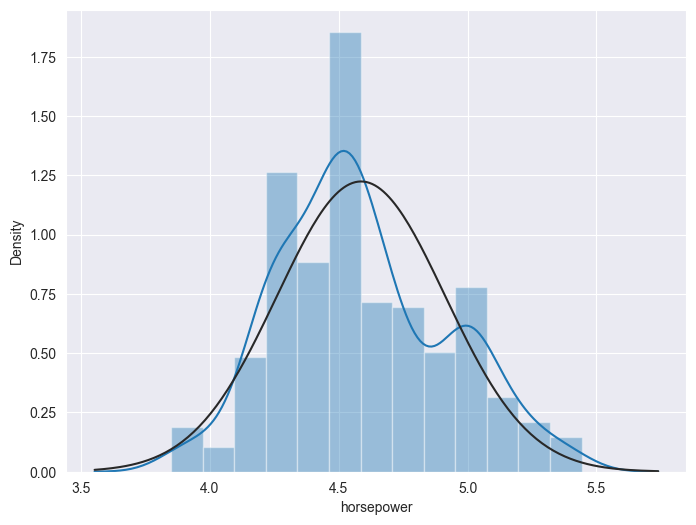

mu: 23.70749354005168 sigma = 7.714419578182979


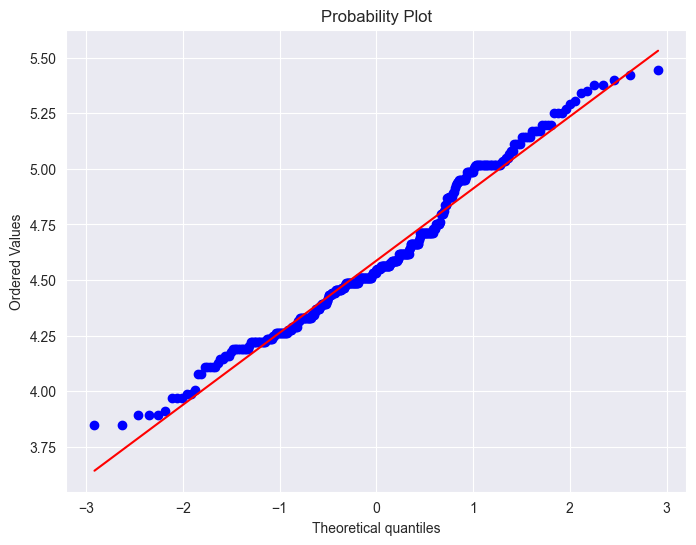

In [62]:

#in horsepower, skewness is greater than 1, so there is positive skewness.We will apply log transformation to make it normal:
df['horsepower'] = np.log1p(df['horsepower'])


sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.distplot(df.horsepower, fit= norm) #fit=norm: normal distribution
plt.show()
print("mu: {} sigma = {}".format(mu, sigma))

# QQ plot again:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df.horsepower, plot = plt)
plt.show()

In [63]:
# Encoding categorical variables:

def one_hot_encoder(dataframe, categorical_cols: list, drop_first: bool = False):
    dataframe = pd.get_dummies(dataframe,
                               columns = categorical_cols,
                               drop_first = drop_first)
    return dataframe

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
print('Multiclass Features: {}'.format(ohe_cols))

df['cylinders'] = df['cylinders'].astype(int)
df['origin'] = df['origin'].astype(int)
df = one_hot_encoder(df, ohe_cols)
df.head()

Multiclass Features: ['origin', 'cylinders']


,mpg,displacement,horsepower,weight,acceleration,model,name,model year,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,2.944439,307.0,4.875197,3504,12.0,Chevelle Malibu,Chevrolet,70,1,0,0,0,0,0,0,1
1,2.772589,350.0,5.111988,3693,11.5,Skylark 320,Buick,70,1,0,0,0,0,0,0,1
2,2.944439,318.0,5.017280,3436,11.0,Satellite,Plymouth,70,1,0,0,0,0,0,0,1
3,2.833213,304.0,5.017280,3433,12.0,Rebel Sst,Amc,70,1,0,0,0,0,0,0,1
4,2.890372,302.0,4.948760,3449,10.5,Torino,Ford,70,1,0,0,0,0,0,0,1


### [8. Preprocessing](#0)<a id="8"></a> <br>

In [66]:
X=df.drop(['mpg',"model","name"],axis=1)
y=df['mpg'].values.reshape(-1,1)

#standardization: with MinMaxScaler

mm=MinMaxScaler()

X=mm.fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}\ny_test Shape: {y_test.shape}')
df.head()

X_train Shape: (309, 13)
X_test Shape: (78, 13)
y_train Shape: (309, 1)
y_test Shape: (78, 1)


,mpg,displacement,horsepower,weight,acceleration,model,name,model year,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,2.944439,307.0,4.875197,3504,12.0,Chevelle Malibu,Chevrolet,70,1,0,0,0,0,0,0,1
1,2.772589,350.0,5.111988,3693,11.5,Skylark 320,Buick,70,1,0,0,0,0,0,0,1
2,2.944439,318.0,5.017280,3436,11.0,Satellite,Plymouth,70,1,0,0,0,0,0,0,1
3,2.833213,304.0,5.017280,3433,12.0,Rebel Sst,Amc,70,1,0,0,0,0,0,0,1
4,2.890372,302.0,4.948760,3449,10.5,Torino,Ford,70,1,0,0,0,0,0,0,1


### [9. Model Building](#0)<a id="9"></a> <br>

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


svc = SVR()
li=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()
xg=XGBRegressor()
lg=LGBMRegressor()
cb=CatBoostRegressor(verbose=False)
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
rd=Ridge()
ls=Lasso()
en=ElasticNet()


names = ["Linear Regression","Decision Tree","Random Forest","KNN","SVM","XGBoost","LGBM","AdaBoost","GradientBoosting"]
classifiers = [li,dt,rf,knn,svc,xg,lg,ab,gb]




### [10. Model Evaluation](#0)<a id="10"></a> <br>

In [68]:
for name, clf in zip(names, classifiers):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
        
    score = clf.score(X_test, y_test)
        
    print("{}: test set score: {} ".format(name, score))
        
    score_train = clf.score(X_train, y_train)
    
    print("{}: train set score: {} ".format(name, score_train))
    
    mse=mean_squared_error(y_test,clf.predict(X_test))
    
    print("{}: mean squared error: {} ".format(name, mse))
    
    rmse=np.sqrt(mse)
    
    print("{}: root mean squared error: {}".format(name, rmse))
    
    print("******************************")


Linear Regression: test set score: 0.8661418808959527 
Linear Regression: train set score: 0.8992148105049289 
Linear Regression: mean squared error: 0.013366928927205255 
Linear Regression: root mean squared error: 0.1156154355058409
******************************
Decision Tree: test set score: 0.7882907985123647 
Decision Tree: train set score: 1.0 
Decision Tree: mean squared error: 0.021141054935344843 
Decision Tree: root mean squared error: 0.1453996387043133
******************************
Random Forest: test set score: 0.8728242479582036 
Random Forest: train set score: 0.9851753982709198 
Random Forest: mean squared error: 0.012699634883448553 
Random Forest: root mean squared error: 0.1126926567414601
******************************
KNN: test set score: 0.8693699634512477 
KNN: train set score: 0.909270102883419 
KNN: mean squared error: 0.013044576048077761 
KNN: root mean squared error: 0.11421285412806109
******************************
SVM: test set score: 0.8801522643274541

# According to train results, we will use these models:
* Gradient Boosting Regressor
* XGBoost Regressor
* LightGBM Regressor
* Random Forest Regressor

### [11. Model Regularization](#0)<a id="11"></a> <br>

# Regularization in machine learning:
Refers to a set of techniques used to prevent overfitting and improve the generalization performance of a model. Overfitting occurs when a model learns the training data too well, capturing the noise or irrelevant patterns, and performs poorly on unseen data.

Regularization techniques introduce additional terms or penalties to the model's objective function during training. These penalties encourage the model to have certain desirable properties, such as simplicity, smoothness, or small coefficient values. By adding these penalties, regularization helps to control the complexity of the model and reduce the impact of individual training examples or features.

The two most commonly used regularization techniques in machine learning are:

1. L1 Regularization (Lasso): This technique adds a penalty term proportional to the absolute values of the model's coefficients to the objective function. It encourages the model to produce sparse solutions by driving some coefficients to exactly zero. L1 regularization can be effective for feature selection, as it tends to eliminate irrelevant or redundant features.

2. L2 Regularization (Ridge): L2 regularization adds a penalty term proportional to the squared magnitudes of the model's coefficients to the objective function. It encourages the model to have smaller and distributed coefficient values. L2 regularization can prevent large fluctuations in the coefficient values and reduce the impact of individual features.

Regularization helps to find a balance between fitting the training data well and generalizing to unseen data. It prevents overfitting by discouraging the model from relying too heavily on specific training examples or features. The strength of regularization is controlled by a hyperparameter that needs to be tuned, typically through techniques like cross-validation, to find the optimal balance for the specific problem at hand.

Fitting 10 folds for each of 30 candidates, totalling 300 fits


Best parameters: {'alpha': 0.2395026619987486}
Best cross-validation score: -0.01
Best estimator:
Ridge(alpha=0.2395026619987486, max_iter=1000, random_state=42)
Ridge MSE: 0.013227390546689869
*********************


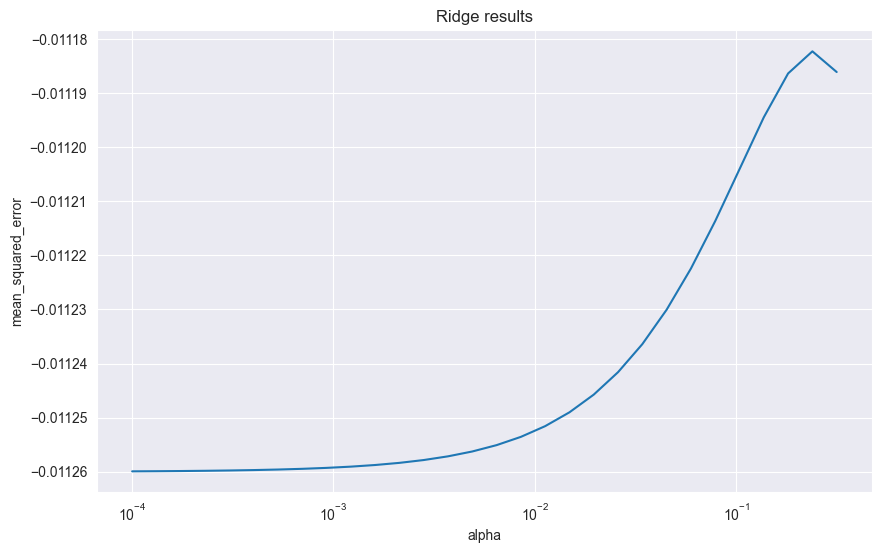

In [69]:
# Regularization with Ridge:

rd=Ridge(random_state=42,max_iter=1000)
alphas = np.logspace(-4, -0.5, 30)

parameters = [{'alpha': alphas}]

grid=GridSearchCV(rd,parameters,cv=10,scoring='neg_mean_squared_error',
                  refit=True,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

scores = grid.cv_results_['mean_test_score']

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best estimator:\n{}".format(grid.best_estimator_))

y_pred=grid.predict(X_test)

print("Ridge MSE: {}".format(mean_squared_error(y_test,y_pred)))
print("*********************")

plt.figure(figsize=(10,6))
plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('mean_squared_error')
plt.title('Ridge results')
plt.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best parameters: {'alpha': 0.0005298316906283707}
Best cross-validation score: -0.01
Best estimator:
Lasso(alpha=0.0005298316906283707, random_state=42)
Lasso MSE: 0.013521290973433906
*********************


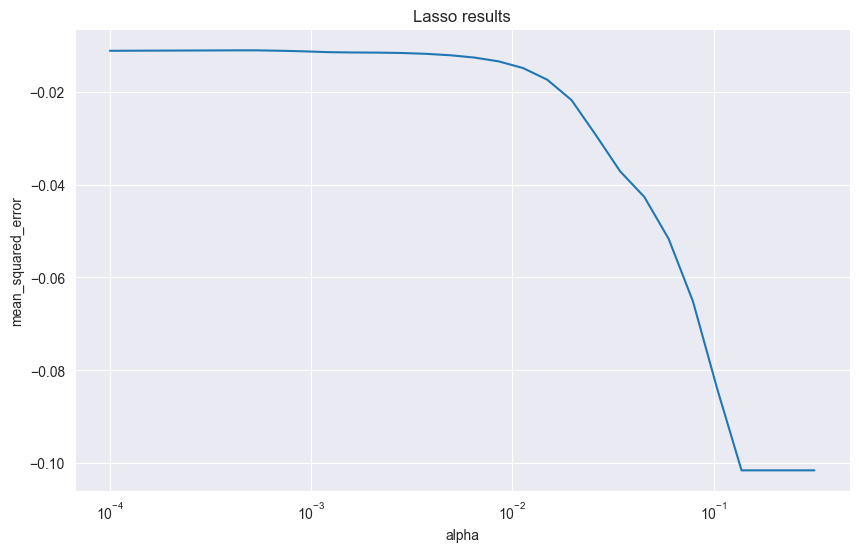

In [70]:
# Regularization with Lasso:

ls=Lasso(random_state=42,max_iter=1000)
alphas = np.logspace(-4, -0.5, 30)

parameters = [{'alpha': alphas}]

grid=GridSearchCV(ls,parameters,cv=10,scoring='neg_mean_squared_error',
                  refit=True,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

scores = grid.cv_results_['mean_test_score']

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best estimator:\n{}".format(grid.best_estimator_))

y_pred=grid.predict(X_test)
    
print("Lasso MSE: {}".format(mean_squared_error(y_test,y_pred)))
print("*********************")

plt.figure(figsize=(10,6))
plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('mean_squared_error')
plt.title('Lasso results')
plt.show()


In [71]:
# Regularization with ElasticNet:

el=ElasticNet(random_state=42,max_iter=1000)
alphas = np.logspace(-4, -0.5, 30)

parameters = [{'alpha': alphas,'l1_ratio':[0.2,0.4,0.6,0.8]}]

grid=GridSearchCV(el,parameters,cv=10,scoring='neg_mean_squared_error',
                  refit=True,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

scores = grid.cv_results_['mean_test_score']

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best estimator:\n{}".format(grid.best_estimator_))

y_pred=grid.predict(X_test)

print("ElasticNet MSE: {}".format(mean_squared_error(y_test,y_pred)))
print("*********************")




Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best parameters: {'alpha': 0.0005298316906283707, 'l1_ratio': 0.8}
Best cross-validation score: -0.01
Best estimator:
ElasticNet(alpha=0.0005298316906283707, l1_ratio=0.8, random_state=42)
ElasticNet MSE: 0.013435330422508707
*********************


* Regularization models did not work well. So we will use the models without regularization.

### [12. Model Tuning](#0)<a id="12"></a> <br>


In [77]:
params = {'n_estimators':[100,200],
            'learning_rate':[0.01,0.1],
            'max_depth':[3,5,13],
            "subsample":[0.5,0.9]}

names = ["XGBoost","LGBM","GradientBoosting"]
classifiers = [xg,lg,gb]

for name,model in zip(names,classifiers):
    grid=GridSearchCV(model,params,cv=10,scoring='neg_mean_squared_error',
                      refit=True,verbose=1,n_jobs=-1,error_score="raise")
    grid.fit(X_train,y_train)
    
    scores = grid.cv_results_['mean_test_score']
    
    print("Best parameters: {}".format(grid.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best estimator:\n{}".format(grid.best_estimator_))
    
    y_pred=grid.predict(X_test)
    
    print("{} MSE: {}".format(i[0],mean_squared_error(y_test,y_pred)))
    print("*********************")

Fitting 10 folds for each of 24 candidates, totalling 240 fits


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validation score: -0.01
Best estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
a MSE: 0.01148971659284174
*********************
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best 

### [13. Averaging models](#0)<a id="13"></a> <br>

In [96]:
model_xgb = grid.best_estimator_


class AveragingModels():
    def __init__(self,models):
        self.models=models
        
    def fit(self,X,y):
        self.models_=[clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
            
        return self

    def predict(self,X):
        preds=np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(preds,axis=1)
    
    
averaged_models=AveragingModels(models=(model_xgb,lg,gb))
averaged_models.fit(X_train,y_train)

y_pred=averaged_models.predict(X_test)
    
    
mse=mean_squared_error(y_test,y_pred)
print("Avaraged MSE: {} ".format(mse))


r2=  r2_score(y_test, y_pred),
print("Avaraged R2: {}".format(r2_score(y_test,y_pred)))


msle =  mean_squared_log_error(y_test, y_pred)
print("Avaraged MSLE: {}".format(msle))


mape =  mean_absolute_percentage_error(y_test, y_pred)
print("Avaraged MAPE: {}".format(mape))


mae = mean_absolute_error(y_test, y_pred)
print("Avaraged MAE: {}".format(mae))
    

rmse=np.sqrt(mse)
print("Avaraged RMSE: {}".format(rmse))

Avaraged MSE: 0.011585208951435033 
Avaraged R2: 0.8839842503755497
Avaraged MSLE: 0.0006819845697811736
Avaraged MAPE: 0.026380400269825695
Avaraged MAE: 0.08198340756591242
Avaraged RMSE: 0.10763460852084256


### [14. Visualization the result](#0)<a id="14"></a> <br>

Text(0.5, 1.0, 'Actual vs Predicted')

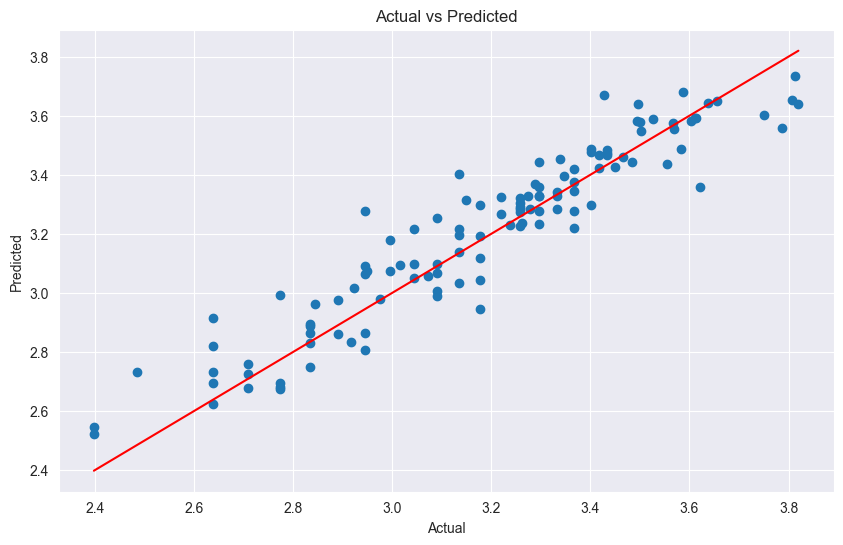

In [101]:
# visualize the results:

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')